In [2]:
import scipy
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

### SIR Model

S(t)  are those susceptible but not yet infected with the disease;

I(t) is the number of infectious individuals;


R(t) are those individuals who have recovered from the disease and now have immunity to it.

In [3]:
def epi_system(t, z, a, b, N):
    S, I, R = z
    return [(-b*S*I/N), (b * S * I / N) - a*I, a*I]

In [4]:
sol = solve_ivp(epi_system, [0,100], [999, 1,0],args = (1./10, 0.2, 1000), dense_output = True)

In [5]:
t = np.linspace(0,100, 600)
SIR = sol.sol(t)

In [6]:
S_sol, I_sol, R_sol = SIR

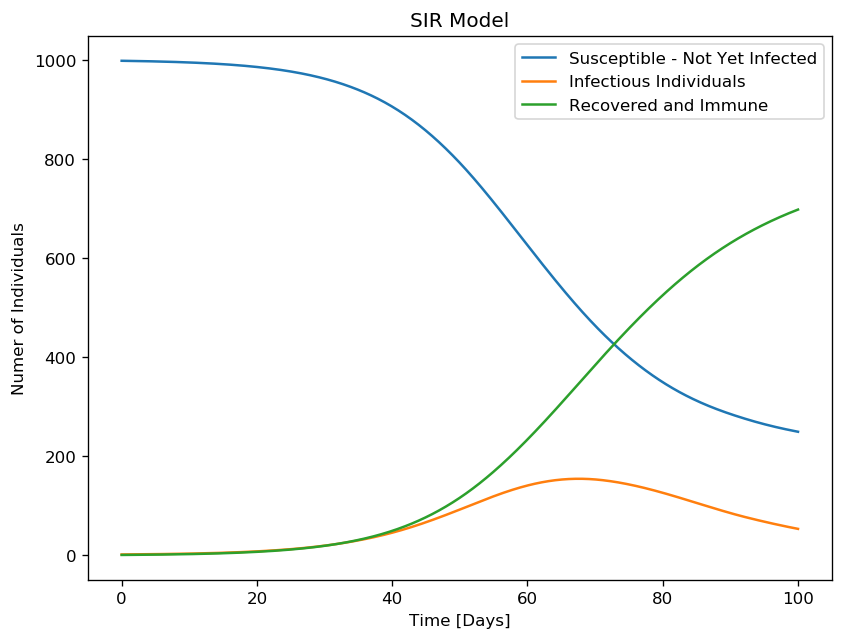

In [7]:
figure(num=1, figsize=(8, 6), dpi=120, facecolor='w', edgecolor='k')
plt.plot(t, S_sol, label = 'Susceptible - Not Yet Infected')
plt.plot(t, I_sol, label = 'Infectious Individuals')
plt.plot(t, R_sol, label = 'Recovered and Immune')
plt.xlabel('Time [Days]')
plt.ylabel('Numer of Individuals')
plt.title('SIR Model')
plt.legend()
plt.show()

### SIS Model

##### gamma := recovery rate,  and beta := infection rate 

In [8]:
def sis_system(t, z, beta, gamma, N):
    
    S, I  = z
    return [(-beta*S*I)/N + gamma*I, (beta*S*I)/N - gamma*I ]

In [9]:
sol = solve_ivp(sis_system, [0,30], [1, 99],args = (.1, 0.2, 100), dense_output = True)

In [10]:
t = np.linspace(0,30, 600)
SIS = sol.sol(t)

In [11]:
S_sol, I_sol  = SIS

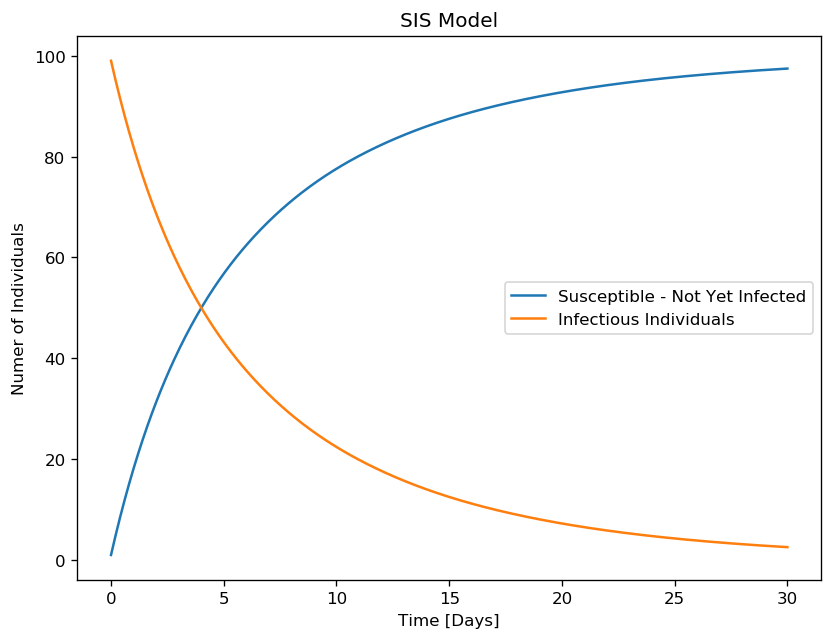

In [12]:
figure(num=1, figsize=(8, 6), dpi=120, facecolor='w', edgecolor='k')
plt.plot(t, S_sol, label = 'Susceptible - Not Yet Infected')
plt.plot(t, I_sol, label = 'Infectious Individuals')

plt.xlabel('Time [Days]')
plt.ylabel('Numer of Individuals')
plt.title('SIS Model')
plt.legend()
plt.show()

### SEIR Model

#### http://www.public.asu.edu/~hnesse/classes/seir.html

__Beta__

The parameter controlling how often a susceptible-infected contact results in a new exposure.

__Gamma__

The rate an infected recovers and moves into the resistant phase.

__Sigma__

The rate at which an exposed person becomes infective.

__Mu__

The natural mortality rate (this is unrelated to disease). This models a population of a constant size

In [13]:
def SEIR_system(t,z,beta, gamma, sigma, nu, N):
    
    S, E, I, R = z
    return [nu*(N-S) - nu*S - beta*I*S/N, beta*I*S/N - (nu +sigma)*E, 
               sigma*E - (gamma + nu)*I, gamma*I - nu*R+nu*S]

In [14]:
sol = solve_ivp(SEIR_system, [0,60], [10, 1, 1,0],args = (0.4, 0.9, 0.4, 0, 12 ), dense_output = True)

In [15]:
t = np.linspace(0,60, 100)
SEIR = sol.sol(t)

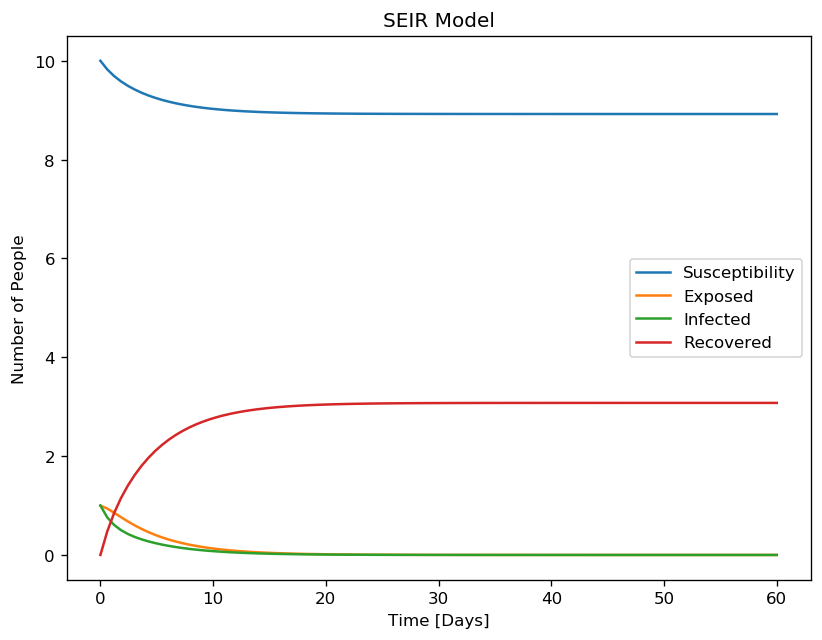

In [16]:
figure(num=1, figsize=(8, 6), dpi=120, facecolor='w', edgecolor='k')
lineObjects = plt.plot(t, SEIR.T)
plt.legend(lineObjects ,('Susceptibility', 'Exposed', 'Infected', 'Recovered' ))
plt.title('SEIR Model')
plt.ylabel('Number of People')
plt.xlabel('Time [Days]')
plt.show()
